In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
from glob import glob
from scipy import optimize
# from hampel import hampel
plt.style.use('dark_background')
color = ['#8dd3c7','#feffb3','#bfbbd9','#fa8174','#81b1d2','#fdb462','#b3de69','#bc82bd','#ccebc4','#ffed6f']



In [6]:
files = glob('**.dat', recursive=True)
path = '/Users/wendy/Desktop/111/GMA/Wendy&Yilun/wendy have fun/01_28_2022_17_09_05/final_aved_Data3min.csv'



In [7]:
def cutdat(data,lowlim,highlim):
    data_x = data['freq'].values
    data_y = data['vals'].values
    data_y = data_y[(data_x > low_lim) & (data_x < up_lim)]
    data_x = data_x[(data_x > low_lim) & (data_x < up_lim)]
    return(data_x,data_y)

In [8]:
background = pd.read_csv(path)
def subtract(data,time,background = background,filenumber = 1):
    freq = data[0].values
    data_sub = data[1].values-background['values'].values/3*(time/60)
    err = (np.sqrt(data[1].values) + (time/180)**2*background['std'])/filenumber
    result = pd.DataFrame([])
    result['freq'] = freq
    result['vals'] = data_sub
    result['std'] = err
    
    return result

In [9]:
def exp(x,ave,sigma,amp,c,b):
    return(amp*np.exp(-(x-ave)**2/(2*sigma**2))+c*x+b)
def mt_fit(data_x,data_y,err_x ,err_y,up_lim,low_lim,N,p0=[1.25,0.05,25,0.1, 0]):

    

    data_y = data_y[(data_x > low_lim) & (data_x < up_lim)]
    
    if type(err_x) is not int:
        err_x = err_x[(data_x > low_lim) & (data_x < up_lim)]
    if type(err_y) is not int:
        err_y = err_y[(data_x > low_lim) & (data_x < up_lim)]
    data_x = data_x[(data_x > low_lim) & (data_x < up_lim)]
    
    func = exp
    ave = []
    sigma = []
    amp = []
    c = []
    b = []
    for i in range(N):
#         data_xe = np.array(data_x)+np.random.normal(0,err_x)
#         data_ye = np.array(data_y)+np.random.normal(0,err_y)

        data_xe = np.random.normal(data_x,err_x)
        data_ye = np.random.normal(data_y,err_y)

        paras, _ = optimize.curve_fit(func, data_xe, data_ye,p0 = p0)
        ave += [paras[0]]
#         print(ave)
        sigma += [paras[1]]
        amp += [paras[2]]
        c += [paras[3]]
        b += [paras[4]]
        
    
#     fig, ax = plt.subplots(figsize = (16,12))

#     ax.scatter(data_x, data_y,s = 0.3)
#     ax.plot(data_x,exp(data_x,*paras), )
#     plt.plot()
    ave_a = np.mean(ave)
    sigma_a = np.mean(sigma)
    amp_a = np.mean(amp)
    c_a = np.mean(c)
    b_a = np.mean(b)
    paras = [ave_a,sigma_a,amp_a,c_a,b_a]
    
    ave_err = np.std(ave)
    sigma_err = np.std(sigma)
    amp_err = np.std(amp)
    c_err = np.std(c)
    b_err = np.std(b)
    errs = [ave_err,sigma_err,amp_err,c_err,b_err]
    
    return (paras, errs)

loc_61cm.dat


/Users/wendy/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/wendy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/wendy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


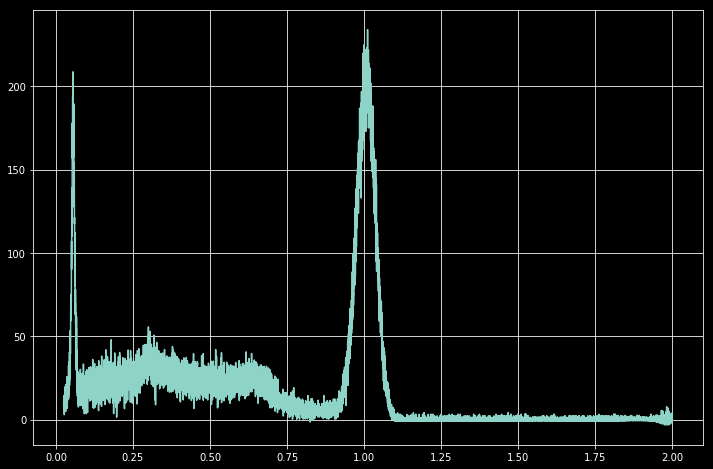

In [10]:
print(files[0])
data = pd.read_csv(files[0],skiprows = 2,sep="\s+", header = None,usecols = [0,1])

dat = subtract(data,180)
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(dat['freq'],dat['vals'])
ax.grid()

up_lim = 1.2
low_lim = 0.8
#Finally do the montecarlo fit with estimate of error
dat_sub = dat
p0 = [0.9909483763329884,-0.02994158305071405,200, -98.07113408323954,111.11068868555057]
datx, daty = cutdat(dat_sub,low_lim,up_lim,)
par, _ = optimize.curve_fit(exp,dat_sub['freq'].values,dat_sub['vals'].values,p0 = p0)
Cs61_paras, Cs61_errs = mt_fit(dat_sub['freq'].values,dat_sub['vals'].values,0, dat_sub['std'].values, \
       up_lim,low_lim,1000,p0 = par)

(0.8, 1.2)

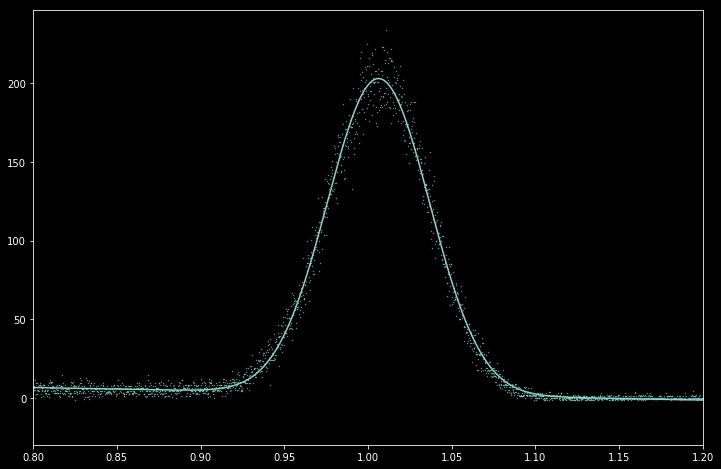

In [11]:
paras = Cs61_paras
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(dat['freq'],dat['vals'],s = 0.1)
ax.plot(dat['freq'],exp(dat['freq'],*paras))
ax.set_xlim(low_lim,up_lim)

In [12]:
print(files[1])

loc_81cm.dat


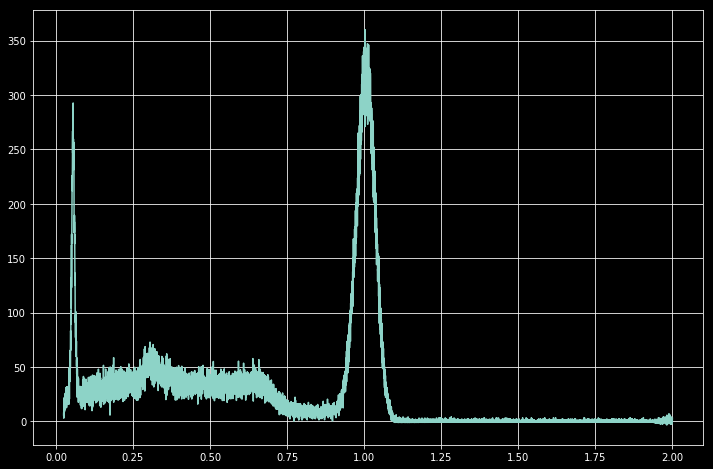

In [13]:

data = pd.read_csv(files[1],skiprows = 2,sep="\s+", header = None,usecols = [0,1])

dat = subtract(data,180)
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(dat['freq'],dat['vals'])
ax.grid()

up_lim = 1.2
low_lim = 0.8
#Finally do the montecarlo fit with estimate of error
dat_sub = dat
p0 = [0.9909483763329884,-0.02994158305071405,350, -98.07113408323954,111.11068868555057]
datx, daty = cutdat(dat_sub,low_lim,up_lim,)
par, _ = optimize.curve_fit(exp,dat_sub['freq'].values,dat_sub['vals'].values,p0 = p0)
Cs81_paras, Cs81_errs = mt_fit(dat_sub['freq'].values,dat_sub['vals'].values,0, dat_sub['std'].values, \
       up_lim,low_lim,1000,p0 = par)

(0.8, 1.2)

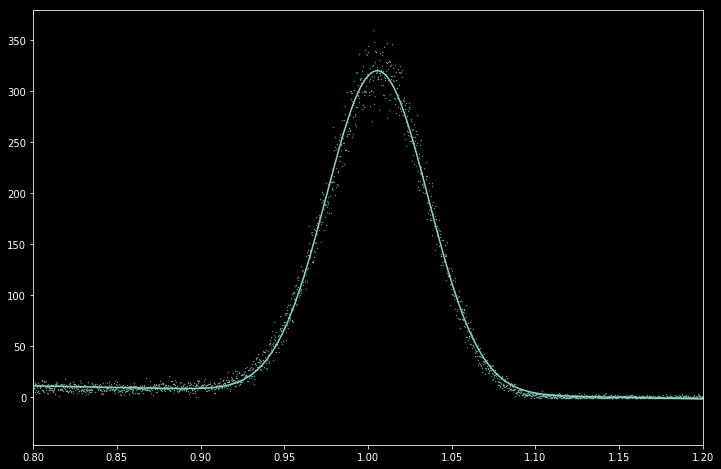

In [14]:
paras = Cs81_paras
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(dat['freq'],dat['vals'],s = 0.1)
ax.plot(dat['freq'],exp(dat['freq'],*paras))
ax.set_xlim(low_lim,up_lim)

In [15]:
print(files[2])

loc_101cm.dat


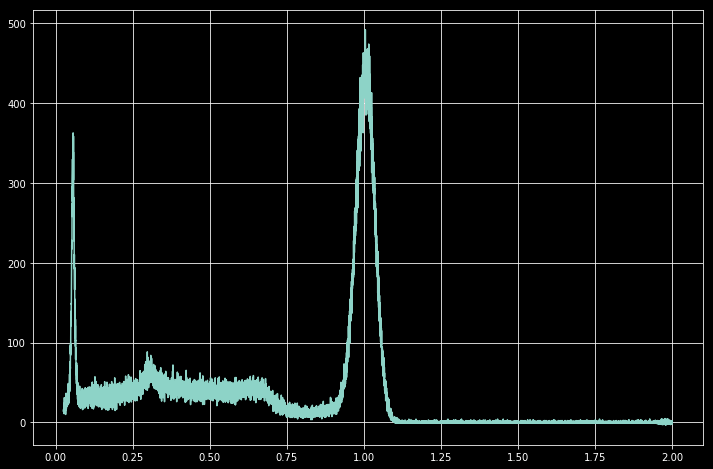

In [16]:

data = pd.read_csv(files[2],skiprows = 2,sep="\s+", header = None,usecols = [0,1])

dat = subtract(data,180)
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(dat['freq'],dat['vals'])
ax.grid()

up_lim = 1.2
low_lim = 0.8
#Finally do the montecarlo fit with estimate of error
dat_sub = dat
p0 = [0.9909483763329884,-0.02994158305071405,450, -98.07113408323954,111.11068868555057]
datx, daty = cutdat(dat_sub,low_lim,up_lim,)
par, _ = optimize.curve_fit(exp,dat_sub['freq'].values,dat_sub['vals'].values,p0 = p0)
Cs101_paras, Cs101_errs = mt_fit(dat_sub['freq'].values,dat_sub['vals'].values,0, dat_sub['std'].values, \
       up_lim,low_lim,1000,p0 = par)

(0.8, 1.2)

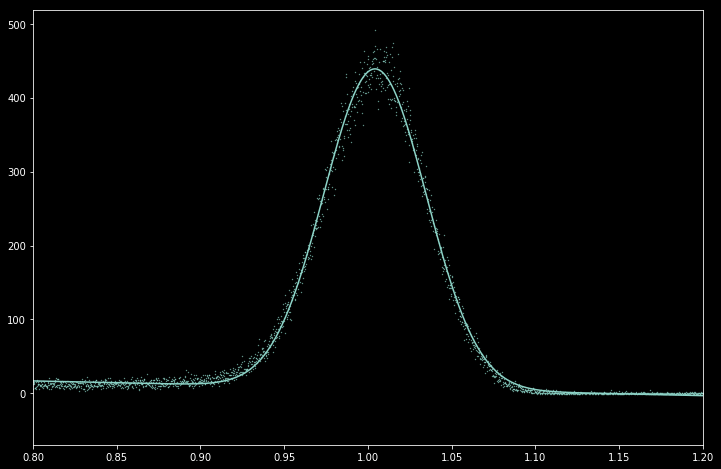

In [17]:
paras = Cs101_paras
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(dat['freq'],dat['vals'],s = 0.1)
ax.plot(dat['freq'],exp(dat['freq'],*paras))
ax.set_xlim(low_lim,up_lim)

In [18]:
print(files[3])

loc71cm.dat


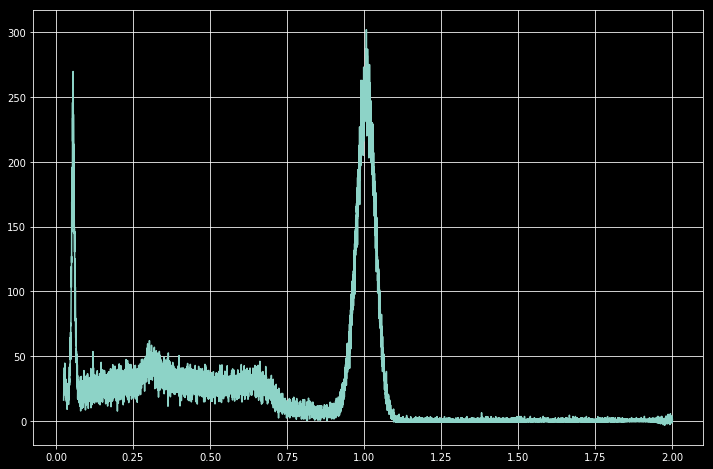

In [19]:

data = pd.read_csv(files[3],skiprows = 2,sep="\s+", header = None,usecols = [0,1])

dat = subtract(data,180)
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(dat['freq'],dat['vals'])
ax.grid()

up_lim = 1.2
low_lim = 0.8
#Finally do the montecarlo fit with estimate of error
dat_sub = dat
p0 = [0.9909483763329884,-0.02994158305071405,250, -98.07113408323954,111.11068868555057]
datx, daty = cutdat(dat_sub,low_lim,up_lim,)
par, _ = optimize.curve_fit(exp,dat_sub['freq'].values,dat_sub['vals'].values,p0 = p0)
Cs71_paras, Cs71_errs = mt_fit(dat_sub['freq'].values,dat_sub['vals'].values,0, dat_sub['std'].values, \
       up_lim,low_lim,1000,p0 = par)

(0.8, 1.2)

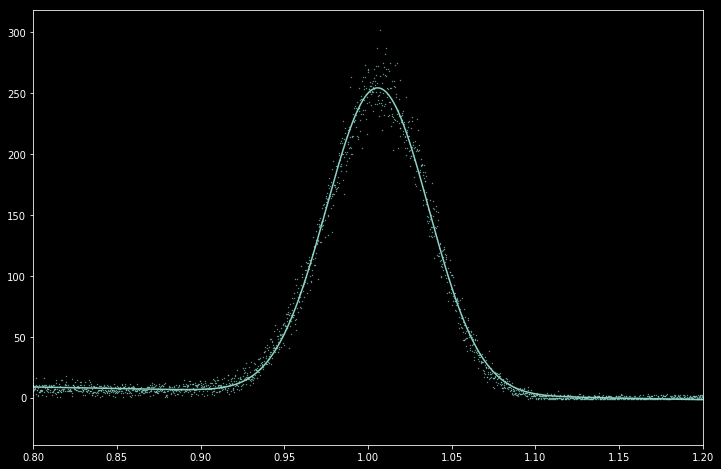

In [20]:
paras = Cs71_paras
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(dat['freq'],dat['vals'],s = 0.1)
ax.plot(dat['freq'],exp(dat['freq'],*paras))
ax.set_xlim(low_lim,up_lim)

In [21]:
print(files[4])

loc_91cm.dat


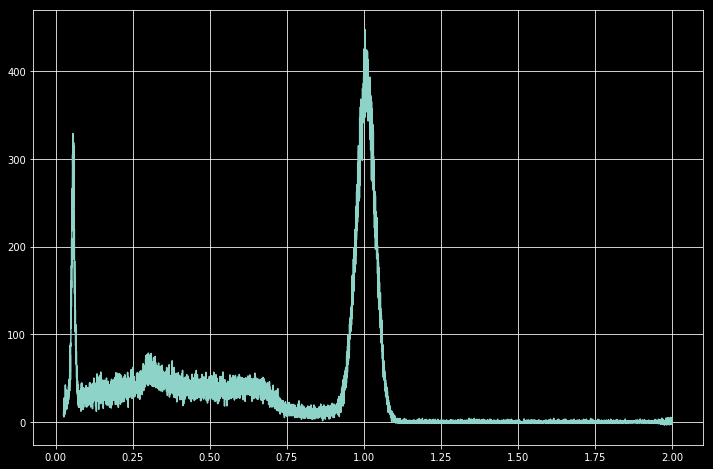

In [22]:

data = pd.read_csv(files[4],skiprows = 2,sep="\s+", header = None,usecols = [0,1])

dat = subtract(data,180)
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(dat['freq'],dat['vals'])
ax.grid()

up_lim = 1.2
low_lim = 0.8
#Finally do the montecarlo fit with estimate of error
dat_sub = dat
p0 = [0.9909483763329884,-0.02994158305071405,350, -98.07113408323954,111.11068868555057]
datx, daty = cutdat(dat_sub,low_lim,up_lim,)
par, _ = optimize.curve_fit(exp,dat_sub['freq'].values,dat_sub['vals'].values,p0 = p0)
Cs91_paras, Cs91_errs = mt_fit(dat_sub['freq'].values,dat_sub['vals'].values,0, dat_sub['std'].values, \
       up_lim,low_lim,1000,p0 = par)

(0.8, 1.2)

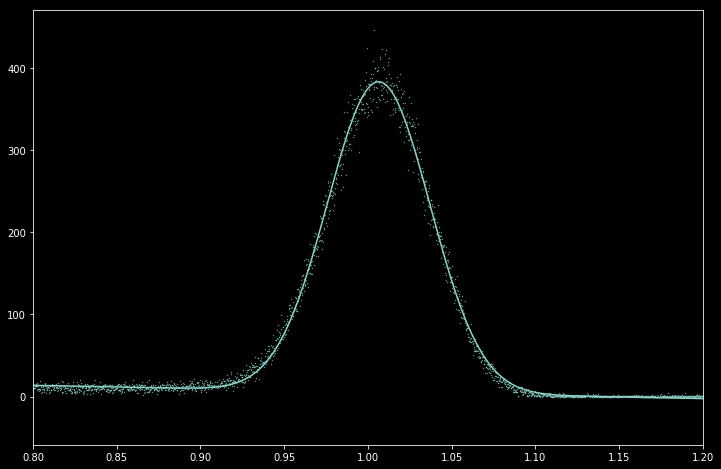

In [23]:
paras = Cs91_paras
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(dat['freq'],dat['vals'],s = 0.1)
ax.plot(dat['freq'],exp(dat['freq'],*paras))
ax.set_xlim(low_lim,up_lim)

In [24]:
print(files[5])

loc_51cm.dat


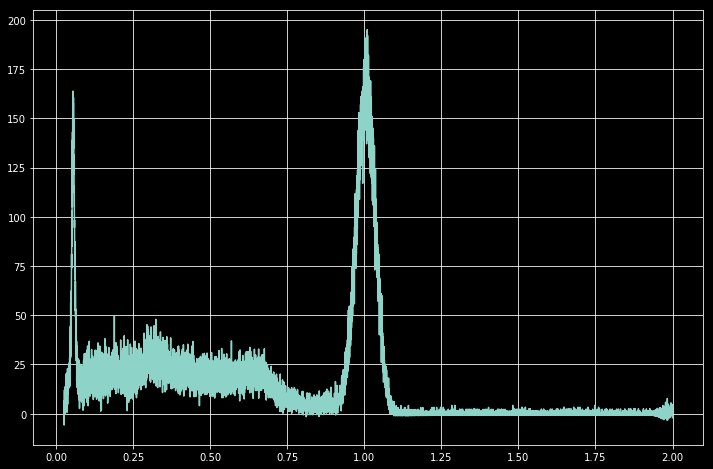

In [25]:

data = pd.read_csv(files[5],skiprows = 2,sep="\s+", header = None,usecols = [0,1])

dat = subtract(data,180)
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(dat['freq'],dat['vals'])
ax.grid()

up_lim = 1.2
low_lim = 0.8
#Finally do the montecarlo fit with estimate of error
dat_sub = dat
p0 = [0.9909483763329884,-0.02994158305071405,170, -98.07113408323954,111.11068868555057]
datx, daty = cutdat(dat_sub,low_lim,up_lim,)
par, _ = optimize.curve_fit(exp,dat_sub['freq'].values,dat_sub['vals'].values,p0 = p0)
Cs51_paras, Cs51_errs = mt_fit(dat_sub['freq'].values,dat_sub['vals'].values,0, dat_sub['std'].values, \
       up_lim,low_lim,1000,p0 = par)

(0.8, 1.2)

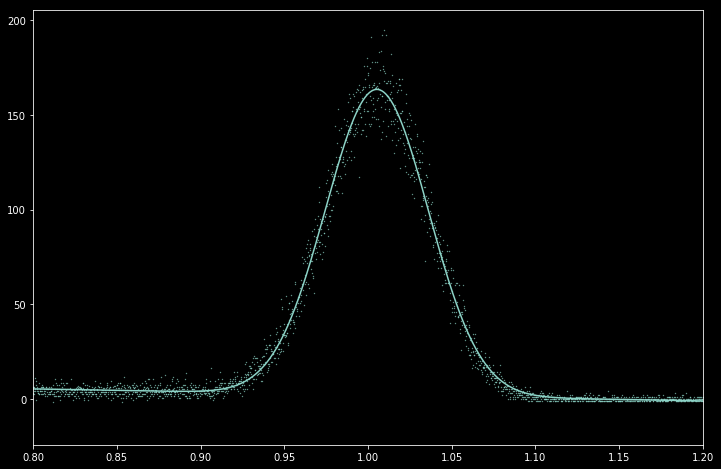

In [26]:
paras = Cs51_paras
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(dat['freq'],dat['vals'],s = 0.1)
ax.plot(dat['freq'],exp(dat['freq'],*paras))
ax.set_xlim(low_lim,up_lim)

In [71]:
results = [Cs51_paras, Cs61_paras, Cs71_paras,Cs81_paras, Cs91_paras,Cs101_paras]
errs = [Cs51_errs, Cs61_errs, Cs71_errs,Cs81_errs, Cs91_errs,Cs101_errs]
locations = [51,61,71,81,91,101]

distances = 158 - np.array(locations)-24.5
peak_vals = np.array(results)[:,2]
peak_errs = np.array(errs)[:,2]



In [72]:
def linear(x,a,b):
    return(a*x+b)
def square(x,a,b,c):
    return(a*x**2+b*x+c)
def inverse(x,a,b,c):
    return(a/x**2+b/x+c)

In [73]:
para_l,err_l = optimize.curve_fit(linear,distances,peak_vals)
para_s,err_s = optimize.curve_fit(square,distances,peak_vals)
para_i,err_i = optimize.curve_fit(inverse,distances,peak_vals)

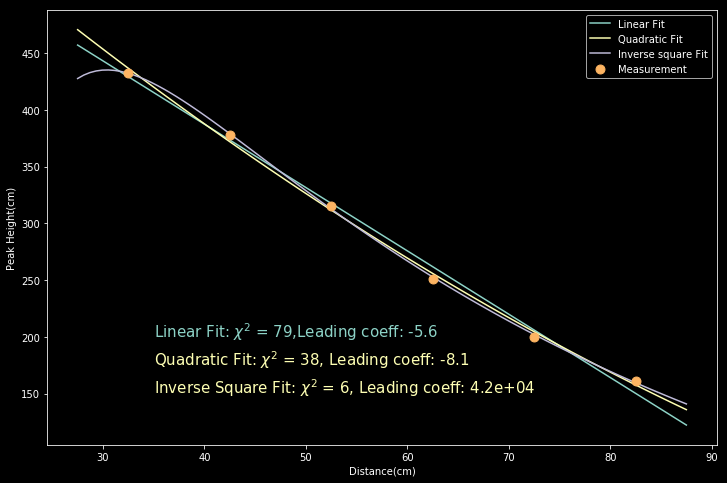

In [86]:
plt.figure(figsize = (12,8))
plt.scatter(distances,peak_vals,color = color[5],label = 'Measurement',s = 80,zorder = 100)
distances1 = np.linspace(min(distances)-5,max(distances)+5,100)
plt.plot(distances1,linear(distances1,*para_l),label = 'Linear Fit',color = color[0])
plt.plot(distances1,square(distances1,*para_s),label = 'Quadratic Fit',color = color[1])
plt.plot(distances1,inverse(distances1,*para_i),label = 'Inverse square Fit',color = color[2])
plt.xlabel('Distance(cm)')
plt.ylabel('Peak Height(cm)')

plt.text(35,200,r'Linear Fit: $\chi^2$ = {:.2g},Leading coeff: {:.2g}'.format(chi_l,para_l[0]),color = color[0],fontsize = 15)


plt.text(35,175,r'Quadratic Fit: $\chi^2$ = {:.2g}, Leading coeff: {:.2g}'.format(chi_s,para_s[1]),color = color[1],fontsize = 15)
plt.text(35,150,r'Inverse Square Fit: $\chi^2$ = {:.2g}, Leading coeff: {:.2g}'.format(chi_i,para_i[1]),color = color[1],fontsize = 15)



plt.legend()

In [75]:
def mt_fit_simple(func,data_x,data_y,err_x ,err_y,N):
    
    parass = []
    errss = []
    for i in range(N):
#         data_xe = np.array(data_x)+np.random.normal(0,err_x)
#         data_ye = np.array(data_y)+np.random.normal(0,err_y)

        data_xe = np.random.normal(data_x,err_x)
        data_ye = np.random.normal(data_y,err_y)
#         print(data_ye)

        paras, errs = optimize.curve_fit(func, data_xe, data_ye,)
        parass += [paras]
        errss += [errs]
        
    return (np.array(parass), np.array(errss))

In [76]:
xerr = 0.5
yerr = peak_errs

parass,errss = mt_fit_simple(linear,distances,peak_vals,xerr,yerr,1000)

In [33]:
np.random.normal(peak_vals,yerr)

array([161.75132699, 200.29536575, 251.30395351, 316.12565409,
       375.49502028, 433.21243902])

In [34]:
slope = np.mean(parass[:,0])
slope_err = np.std(parass[:,0])

In [35]:
np.mean(errss[:,0])

-1.4365078840887773

In [36]:
slope_err

0.07295636692672958

In [41]:
xerr

0.5

In [45]:
def chisquared(obs,model,err):
    return sum((obs-model)**2/err)

In [78]:
chi_s = chisquared(peak_vals,square(distances,*para_s),yerr)/3

In [79]:
chi_l = chisquared(peak_vals,linear(distances,*para_l),yerr)/4

In [80]:
chi_i = chisquared(peak_vals,inverse(distances,*para_i),yerr)/3